In [1]:
import numpy as np

class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr=lr
        self.h=None

    def update(self,params,grads):
        if self.h is None:
            self.h={}
            for key,val in params.items():
                self.h[key]=np.zeros_like(val)
        for key in params.keys():
            self.h[key]+=grads[key]*grads[key]
            params[key]-=self.lr*grads[key]*np.sqrt(self.h[key]+1e-7)           # 1e-7은 작은 값을 더하는 부분. 
                                                                                # 이 작은 값은 self.h[key]에 0이 담겨있다해도 0으로 나누는 상태를 막아준다.



In [8]:
#추후에 볼 예정

class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

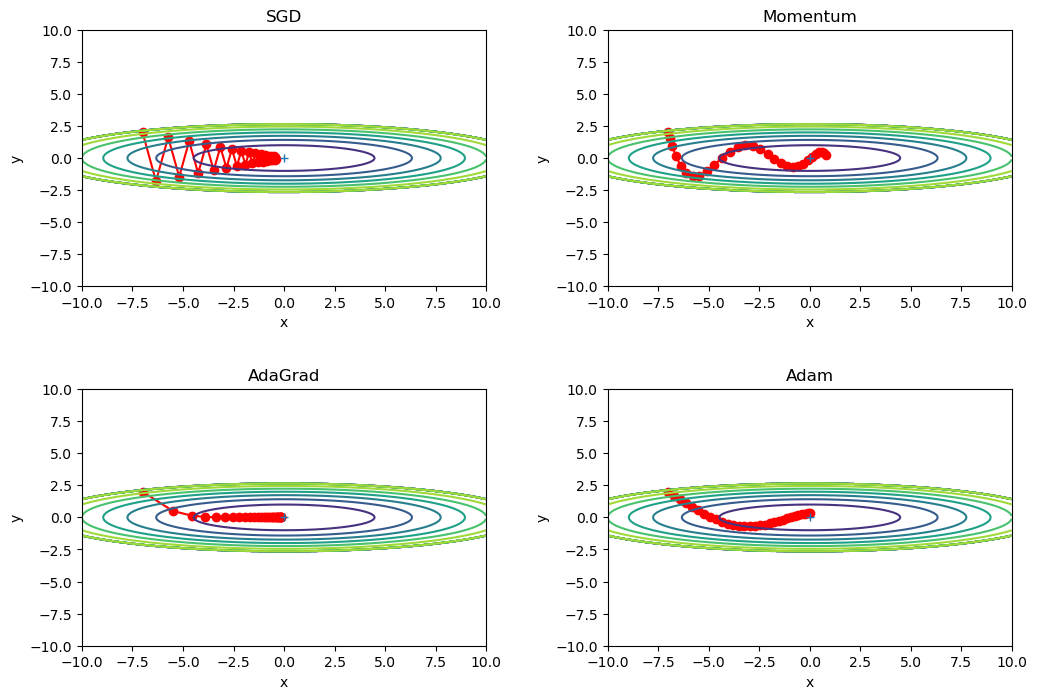

In [ ]:
#각각의 optimizer함수들 비교한 것. 코드는 자세히 보지 않았다.

# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

plt.figure(figsize=(12, 8))

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.subplots_adjust(wspace=0.3, hspace=0.4)    
plt.show()

===========iteration:0===========
SGD:2.307560206412903
Momentum:2.401471708637034
AdaGrad:2.1418370253576056
Adam:2.20099511554416
===========iteration:100===========
SGD:1.647944753739083
Momentum:0.5145181600595601
AdaGrad:0.22836671585154844
Adam:0.35677716155345096
===========iteration:200===========
SGD:0.8231239104052694
Momentum:0.3022517260787453
AdaGrad:0.08272769966457574
Adam:0.2206868764788955
===========iteration:300===========
SGD:0.42358089806406535
Momentum:0.13255461700721696
AdaGrad:0.0521686963944111
Adam:0.08366064119059821
===========iteration:400===========
SGD:0.5466851184310053
Momentum:0.25239462873897006
AdaGrad:0.08188654245098997
Adam:0.1158742483634338
===========iteration:500===========
SGD:0.5132397931434334
Momentum:0.22149991218089135
AdaGrad:0.12558113286861
Adam:0.16419070432025273
===========iteration:600===========
SGD:0.3729827346215342
Momentum:0.13785680966035796
AdaGrad:0.044320335482620765
Adam:0.0829717495793105
===========iteration:700======

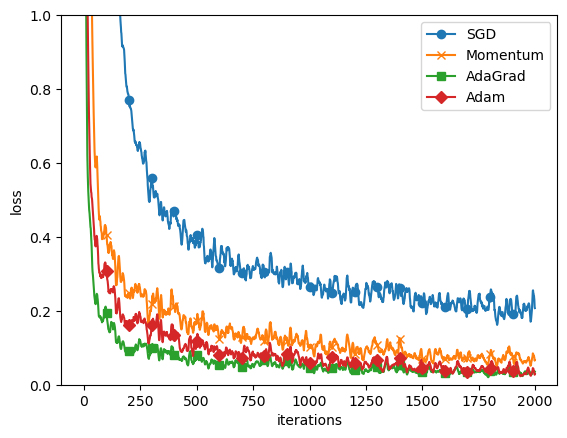

In [10]:
#각각의 학습진도 비교. 코드에 대해 자세히 보지는 않았다.

# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

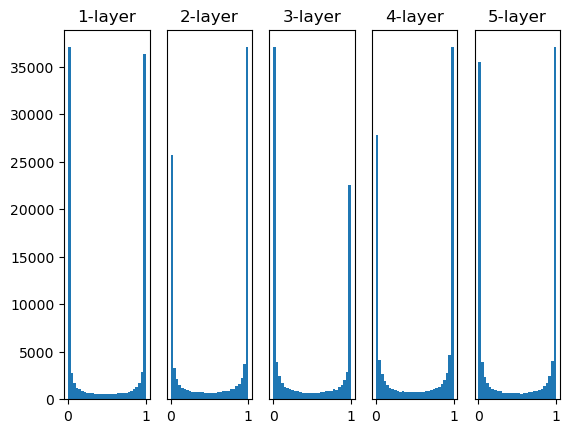

In [2]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1         # 표준편차 1을 의미.
                                                        # 만약 평균이 0이고 표준편차가 1인 표준 정규분포에서 난수를 생성한 후, 
                                                        # 이를 σ(표준편차)로 곱하면, 그 난수는 평균이 0이고 표준편차가 σ인 정규분포를 따르게 됩니다.
   

    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

0과 1에 치우침

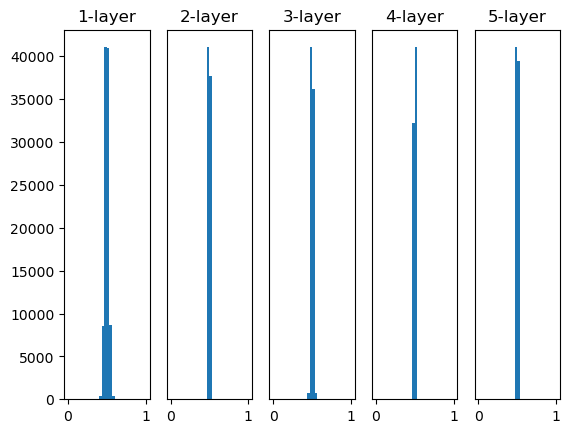

In [5]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 0.01          #이번에는 표준편차를 0.01로 설정
    

    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

0.5 부근에 치우침. 

활성화 값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있다. <br>왜? 이상황에서는 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없다는 뜻이다.

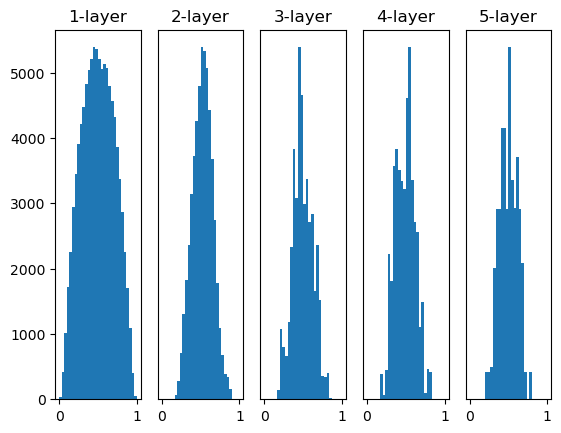

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num)/np.sqrt(node_num)          #이번에는 표준편차를 1/sqrt(node_num)으로 설정.(Xavier 초기값값)
    

    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier초기값을 사용해서 보니 확실히 넓게 분포 되었다. 각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대된다.

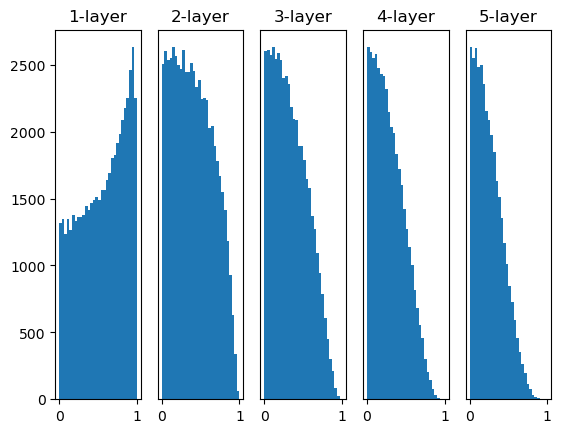

In [9]:
#이번에는 tanh함수를 이용.(활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져있다.)

# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

epoch:0 | 0.09 - 0.129
epoch:1 | 0.092 - 0.173
epoch:2 | 0.094 - 0.289
epoch:3 | 0.097 - 0.419
epoch:4 | 0.111 - 0.51
epoch:5 | 0.125 - 0.581
epoch:6 | 0.131 - 0.631
epoch:7 | 0.136 - 0.675
epoch:8 | 0.151 - 0.702
epoch:9 | 0.161 - 0.729
epoch:10 | 0.175 - 0.752
epoch:11 | 0.19 - 0.772
epoch:12 | 0.198 - 0.788
epoch:13 | 0.212 - 0.806
epoch:14 | 0.223 - 0.819
epoch:15 | 0.232 - 0.834
epoch:16 | 0.256 - 0.84
epoch:17 | 0.263 - 0.854
epoch:18 | 0.277 - 0.869
epoch:19 | 0.279 - 0.879


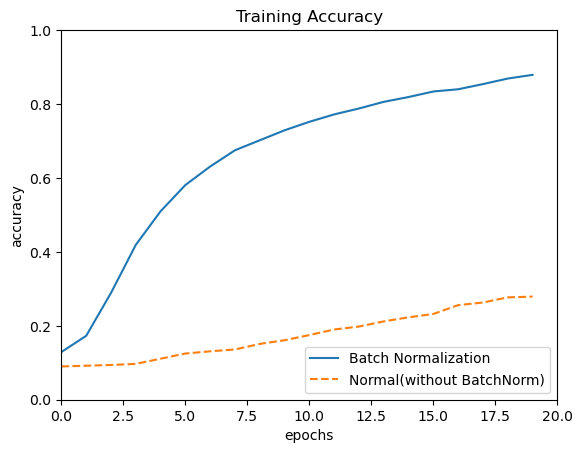

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

train_acc_list, bn_train_acc_list = __train(weight_scale_list[4])
    
plt.title("Training Accuracy")
plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
plt.ylim(0, 1.0)
plt.xlim(0, max_epochs)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.09666666666666666, test acc:0.095
epoch:1, train acc:0.11333333333333333, test acc:0.094
epoch:2, train acc:0.12666666666666668, test acc:0.1023
epoch:3, train acc:0.16333333333333333, test acc:0.1242
epoch:4, train acc:0.22333333333333333, test acc:0.1507
epoch:5, train acc:0.25, test acc:0.1738
epoch:6, train acc:0.2966666666666667, test acc:0.2016
epoch:7, train acc:0.32666666666666666, test acc:0.2368
epoch:8, train acc:0.38333333333333336, test acc:0.266
epoch:9, train acc:0.41, test acc:0.2911
epoch:10, train acc:0.44333333333333336, test acc:0.3136
epoch:11, train acc:0.47333333333333333, test acc:0.3361
epoch:12, train acc:0.49, test acc:0.3581
epoch:13, train acc:0.5033333333333333, test acc:0.3808
epoch:14, train acc:0.5366666666666666, test acc:0.3978
epoch:15, train acc:0.6, test acc:0.4149
epoch:16, train acc:0.5866666666666667, test acc:0.4256
epoch:17, train acc:0.59, test acc:0.439
epoch:18, train acc:0.63, test acc:0.4536
epoch:19, train acc:0.6566

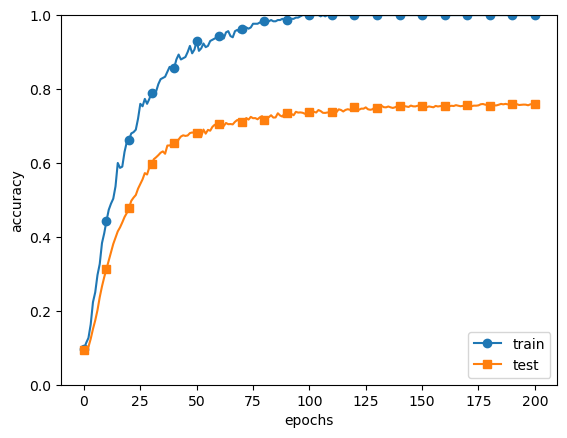

In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 과대적합을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.10333333333333333, test acc:0.1038
epoch:1, train acc:0.12, test acc:0.1103
epoch:2, train acc:0.13333333333333333, test acc:0.1256
epoch:3, train acc:0.15666666666666668, test acc:0.1482
epoch:4, train acc:0.19333333333333333, test acc:0.166
epoch:5, train acc:0.20333333333333334, test acc:0.1703
epoch:6, train acc:0.24333333333333335, test acc:0.2016
epoch:7, train acc:0.30333333333333334, test acc:0.2223
epoch:8, train acc:0.3466666666666667, test acc:0.2453
epoch:9, train acc:0.38333333333333336, test acc:0.2643
epoch:10, train acc:0.45, test acc:0.2864
epoch:11, train acc:0.47333333333333333, test acc:0.3042
epoch:12, train acc:0.5133333333333333, test acc:0.3294
epoch:13, train acc:0.5266666666666666, test acc:0.3334
epoch:14, train acc:0.55, test acc:0.3559
epoch:15, train acc:0.6, test acc:0.3784
epoch:16, train acc:0.5966666666666667, test acc:0.38
epoch:17, train acc:0.62, test acc:0.4068
epoch:18, train acc:0.6266666666666667, test acc:0.4161
epoch:19, t

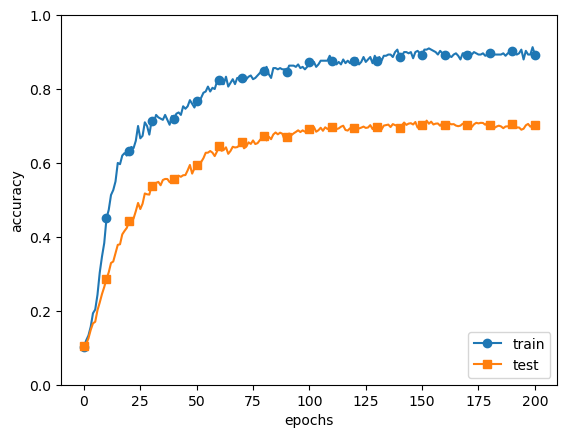

In [8]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 과대적합을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1 # 가중치 감쇠 설정

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

위와는 달리 train과 test의 accuracy 격차가 줄어들었다.

In [12]:
class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio       #x.shape이 tuple로 나오기 때문에 x.shape의 튜플을 풀어주려고 *를 사용.
            return x * self.mask                                            #무작위로 뉴런을 꺼준다.
        else:                                                               #훈련이 아닌 경우 -> 드롭아웃이 적용이 안되도록 한다.
            return x * (1.0 - self.dropout_ratio)                           #각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력한다.

    def backward(self, dout):                                               #역전파할 때. dout에는 상류에서 전해진 기울기가 들어간다.
        return dout * self.mask                                             #순전파때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단한다.

In [ ]:
#참고고

#trainer.py의 일부 정의 주석설명

def train_step(self):
    # 현재 훈련 데이터를 mini-batch 크기만큼 랜덤하게 샘플링하는 코드
    batch_mask = np.random.choice(self.train_size, self.batch_size)  # 훈련 데이터에서 mini-batch 크기만큼 인덱스를 랜덤하게 선택
    x_batch = self.x_train[batch_mask]  # x_train에서 선택된 인덱스에 해당하는 데이터 샘플을 가져옴
    t_batch = self.t_train[batch_mask]  # t_train에서 선택된 인덱스에 해당하는 레이블을 가져옴
    
    grads = self.network.gradient(x_batch, t_batch)  # 신경망에서 x_batch와 t_batch를 사용하여 기울기 계산
    self.optimizer.update(self.network.params, grads)  # 계산된 기울기를 사용해 옵티마이저로 신경망 파라미터를 갱신
    
    loss = self.network.loss(x_batch, t_batch)  # mini-batch에 대해 손실 함수 계산
    self.train_loss_list.append(loss)  # 손실 값을 train_loss_list에 추가 (훈련 손실 기록용)
    
    # verbose가 True이면, 손실값을 출력
    if self.verbose: 
        print("train loss:" + str(loss))

    # 한 epoch이 끝났을 때(현재 iter가 iter_per_epoch의 배수일 때)
    if self.current_iter % self.iter_per_epoch == 0:
        self.current_epoch += 1  # epoch 수를 1 증가시킴
        
        # 샘플링된 데이터와 레이블을 초기화
        x_train_sample, t_train_sample = self.x_train, self.t_train
        x_test_sample, t_test_sample = self.x_test, self.t_test
        
        # 만약 evaluate_sample_num_per_epoch가 None이 아니면, 훈련과 테스트에 사용될 샘플의 개수를 제한
        if not self.evaluate_sample_num_per_epoch is None:
            t = self.evaluate_sample_num_per_epoch  # 샘플의 개수를 가져옴
            # 상위 t개의 샘플만 사용하여 평가
            x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
            x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
        
        # 훈련 데이터와 테스트 데이터의 정확도를 계산
        train_acc = self.network.accuracy(x_train_sample, t_train_sample)
        test_acc = self.network.accuracy(x_test_sample, t_test_sample)
        
        # 정확도를 각각 훈련 및 테스트 정확도 리스트에 추가
        self.train_acc_list.append(train_acc)
        self.test_acc_list.append(test_acc)
        
        # verbose가 True이면, 현재 epoch의 훈련 정확도와 테스트 정확도를 출력
        if self.verbose: 
            print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
    
    # 현재 반복 횟수(current_iter)를 1 증가시킴
    self.current_iter += 1


def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))

train loss:2.296131357831064
=== epoch:1, train acc:0.12666666666666668, test acc:0.12 ===
train loss:2.2895049488700105
train loss:2.295194848526239
train loss:2.310774614000066
=== epoch:2, train acc:0.12333333333333334, test acc:0.1197 ===
train loss:2.2984283410533175
train loss:2.2999253536232125
train loss:2.3005018729153695
=== epoch:3, train acc:0.12333333333333334, test acc:0.1198 ===
train loss:2.286802082953066
train loss:2.2938108259340395
train loss:2.303740585525671
=== epoch:4, train acc:0.12666666666666668, test acc:0.1196 ===
train loss:2.292163751627518
train loss:2.276614184562736
train loss:2.2853726741235145
=== epoch:5, train acc:0.13666666666666666, test acc:0.1183 ===
train loss:2.288450072034536
train loss:2.2995888919789103
train loss:2.282997602992627
=== epoch:6, train acc:0.13666666666666666, test acc:0.1182 ===
train loss:2.2896493616712514
train loss:2.290779358612145
train loss:2.2861188572881037
=== epoch:7, train acc:0.14, test acc:0.1173 ===
train los

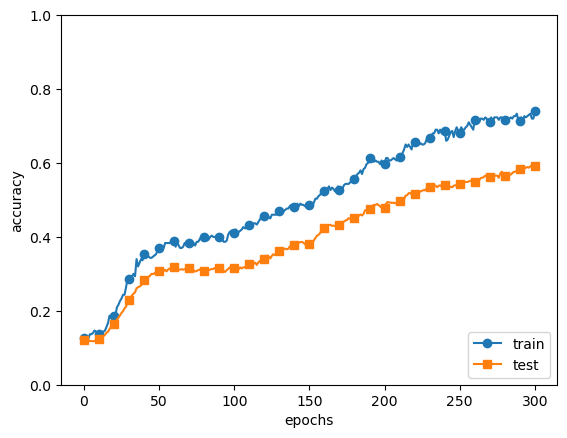

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [18]:
#shuffle_dataset        common/util.py에 있음.
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]       #참고로 x[permutation,:]와 x[permutation]는 같다.  
    t = t[permutation]

    return x, t

TypeError: 'lr' is an invalid keyword argument for print()

In [70]:
10**np.random.uniform(-3,3)                     # np.random.unifrom은 NumPy에서 제공하는 균등분포 함수

1.8238179946599553

In [72]:
# 최소값, 최대값, 데이터 개수 순서로 Parameter를 입력해준다.
np.random.uniform(0,500,100)

array([370.96763574, 192.83325793, 468.33317853, 274.39033748,
       146.53676494,  12.92480218, 431.98271422,  57.78310979,
       257.2632894 , 319.36355198, 390.48836373, 435.45422038,
       418.57381649, 309.09027022, 456.55187942, 290.16848154,
       317.12122342, 487.25403345, 357.34307333, 395.72113125,
        49.39754393, 113.13347057, 168.68809699, 485.55572665,
       474.3581467 ,  82.24862283, 456.74266015, 365.75522585,
       265.69753641, 189.36678032, 266.93012777, 146.58887693,
        37.30542431, 396.90849265, 429.97802169, 177.92411036,
       279.6474351 , 256.51915246,   9.14104551, 329.9956169 ,
       280.60385593, 232.83813851, 232.11495526,  97.90866826,
       497.551613  , 429.3156302 , 135.58725011, 135.62334028,
       453.23382824, 130.83660867,   3.54917587, 352.20557062,
       442.14434648, 369.0927966 , 154.81952494, 112.95586139,
       132.29224438, 201.69609363,  60.92841554, 467.65660469,
        10.10260438, 275.15768362, 358.92809896, 412.50

In [73]:
# 가중치 감소계수를 10**-8 ~ 10**-4 사이, 학습률을 10**-6 ~ 10**-2로 하고싶다면?
weight_decay=10**np.random.uniform(-8,-4)
lr=10*np.random.uniform(-6,-2)

In [ ]:
#참고
#results_val의 예시
{
    "lr:0.001, weight decay:0.0001": [0.75, 0.8, 0.85, 0.9, ...],  # 검증 정확도 리스트
    "lr:0.01, weight decay:0.01": [0.7, 0.75, 0.8, 0.83, ...],
    "lr:0.1, weight decay:0.00001": [0.8, 0.85, 0.88, 0.9, ...]
}

val acc:0.13 | lr:0.00022495980109618806, weight decay:1.4730742188100402e-08
val acc:0.09 | lr:0.0002392916048090201, weight decay:3.365205937726938e-07
val acc:0.06 | lr:1.807440579589641e-05, weight decay:8.986038070714523e-07
val acc:0.4 | lr:0.0026037339113605517, weight decay:3.633042264041277e-06
val acc:0.13 | lr:4.0323477740419266e-05, weight decay:3.935113676693338e-06
val acc:0.15 | lr:0.0004594828078475898, weight decay:4.826262765212967e-07
val acc:0.15 | lr:0.0006764049951371778, weight decay:4.5327141610625423e-07
val acc:0.6 | lr:0.0032547913282847184, weight decay:7.1586752116123546e-06
val acc:0.13 | lr:1.2544758795424821e-06, weight decay:4.7489140231541994e-05
val acc:0.1 | lr:1.4157261180731453e-06, weight decay:7.716008424814267e-07
val acc:0.13 | lr:0.00032514216714667324, weight decay:1.0330790182089207e-07
val acc:0.21 | lr:0.0014931025617614983, weight decay:1.9818812745083e-08
val acc:0.11 | lr:7.919712992243965e-05, weight decay:1.2254234091087172e-05
val ac

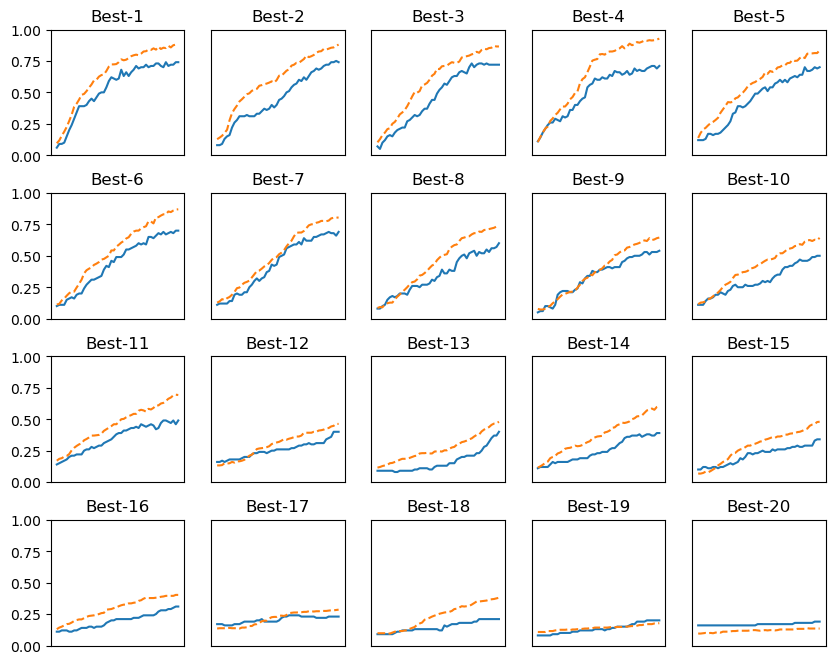

In [81]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)            # 매번 다른 lr과 weight+decay를 이용해서 accuracy를 측정.
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)       # key를 이렇게 설정하는 것임.
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))            # np.ceil()은 소수점을 올림하는 함수
i = 0

plt.figure(figsize=(10, 8))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):   #[-1]은 마지막에서의 정확도인데, epoch에서의 정확도를 의미(sorted함수 찾아보셈)
    # 각 하이퍼파라미터 조합에 대한 검증 정확도 출력
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    # subplot을 사용해 그래프 배치하기: row_num 행, col_num 열, i+1번째 위치에 그래프 삽입
    plt.subplot(row_num, col_num, i+1)
    
    # 그래프 제목 설정
    plt.title("Best-" + str(i+1))
    
    # y축 범위를 0.0에서 1.0 사이로 설정
    plt.ylim(0.0, 1.0)
    
    # i가 5로 나누어 떨어지지 않으면 y축 눈금을 생략
    if i % 5: plt.yticks([])

    # x축 눈금을 생략
    plt.xticks([])

    # x는 val_acc_list의 길이에 맞게 x축 데이터 생성
    x = np.arange(len(val_acc_list))

    # 검증 정확도 그래프를 그리기 (실선)
    plt.plot(x, val_acc_list)

    # 훈련 정확도 그래프를 그리기 (점선)
    plt.plot(x, results_train[key], "--")

    # 그래프 번호 증가
    i += 1

    # 그래프가 지정된 개수(graph_draw_num)를 넘으면 종료
    if i >= graph_draw_num:
        break

plt.subplots_adjust(wspace=0.2, hspace=0.3)    
plt.show()